## DSC 530 Data Exploration and Analysis 
* 4.2 Exercise: Probability Mass Functions and Cumulative Distribution Functions

# Chapter 3

In [4]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

In [46]:
import numpy as np

In [6]:
import nsfg
import first
import thinkstats2
import thinkplot

In [9]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

## Exercises

### 3-1

**Exercise:** Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable `numkdhh` to construct the actual distribution for the number of children under 18 in the respondents' households.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means.

In [10]:
resp = nsfg.ReadFemResp() # Saving to variable 'resp' 

In [11]:
pmf = thinkstats2.Pmf(resp['numkdhh'], label = 'actual') # Creating the pmf variable from 'numkdh' column
print('Mean', pmf.Mean()) # Calculating and printing pmf mean

Mean 1.024205155043831


In [12]:
pmf # Printing pmf to view values and help myself understand 

Pmf({0: 0.466178202276593, 1: 0.21405207379301322, 2: 0.19625801386889966, 3: 0.08713855815779145, 4: 0.025644380478869556, 5: 0.01072877142483318}, 'actual')

In [13]:
def BiasedPmf(pmf, label): # Defines a function to calculate a 'biased' pmf
    new_pmf = pmf.Copy(label=label) 
    for x, p in pmf.Items():
        new_pmf.Mult(x,x)
    new_pmf.Normalize()
    return new_pmf

In [14]:
biased_pmf = BiasedPmf(pmf, 'biased') # Saving the biased pmf to a variable 

In [15]:
biased_pmf # Printing biased pmf to view values for my own understanding 

Pmf({0: 0.0, 1: 0.20899335717935616, 2: 0.38323965252938175, 3: 0.25523760858456823, 4: 0.10015329586101177, 5: 0.052376085845682166}, 'biased')

In [16]:
# Printing both obsereved and actual means to compare
print("Actual mean -> ", pmf.Mean())
print("Observed mean -> ", biased_pmf.Mean())

Actual mean ->  1.024205155043831
Observed mean ->  2.403679100664282


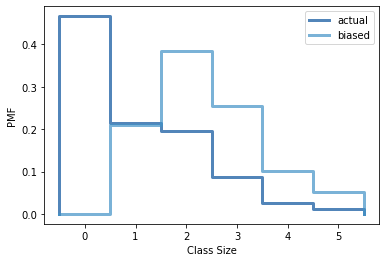

<Figure size 576x432 with 0 Axes>

In [18]:
# Plotting actual and biased pmf
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Show(xlabel='Class Size', ylabel='PMF')

### 3-2

**Exercise:** In Chapter 3 we computed the mean of a sample by adding up
the elements and dividing by n.  If you are given a PMF, you can
still compute the mean, but the process is slightly different:
%
$$ \bar x = \sum_i p_i~x_i $$
%
where the $x_i$ are the unique values in the PMF and $p_i=PMF(x_i)$.
Similarly, you can compute variance like this:
%
$$ S^2 = \sum_i p_i~(x_i - \bar x)^2 $$
% 
Write functions called `PmfMean` and `PmfVar` that take a
Pmf object and compute the mean and variance.  To test these methods,
check that they are consistent with the methods `Mean` and `Var`
provided by `Pmf`.

In [7]:
def PmfMean(pmf):
    """Computes the mean of a PMF.
    Returns:
        float mean
    """
    return sum(p * x for x, p in pmf.Items())

In [43]:
PmfMean(pmf) # pmf is defined below from the random numbers, that cell must be run first.

0.4925533655339738

In [48]:
pmf.Mean() # Using the mean fuction provided by pmf

0.4925533655339738

In [8]:
def PmfVar(pmf, mu=None):
    """Computes the variance of a PMF.
    mu: the point around which the variance is computed;
            if omitted, computes the mean
    returns: float variance
    """
    if mu is None:
        mu = PmfMean(pmf)

    return sum(p * (x - mu) ** 2 for x, p in pmf.Items())

In [49]:
PmfVar(pmf) # Same pmf from random numbers

0.0849390027359729

In [50]:
pmf.Var() # Using the var function provided by pmf

0.0849390027359729

# Chapter 4

## Exercises

### 4-1

**Exercise:** How much did you weigh at birth? If you don’t know, call your mother or someone else who knows. Using the NSFG data (all live births), compute the distribution of birth weights and use it to find your percentile rank. If you were a first baby, find your percentile rank in the distribution for first babies. Otherwise use the distribution for others. If you are in the 90th percentile or higher, call your mother back and apologize.

In [20]:
import first

live, firsts, others = first.MakeFrames()

In [21]:
def PercentileRank(scores, your_score): # Function to return percentile_rank
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1

    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

In [22]:
weights = live.totalwgt_lb # Setting total weight of live births to a variable "weights"
first_cdf = thinkstats2.Cdf(weights, label='live') # Using the thinkstats2 CDF function to create the CDF of weights

In [42]:
first_cdf.PercentileRank(8.3) # Taking my baby weight and getting the percentile rank

78.68997565833149

### 4-2

**Exercise:** The numbers generated by `numpy.random.random` are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.

Generate 1000 numbers from `numpy.random.random` and plot their PMF.  What goes wrong?

Now plot the CDF. Is the distribution uniform?

In [27]:
random_numbers = np.random.random(1000) # Creates 1000 random numbers

In [35]:
pmf = thinkstats2.Pmf(random_numbers) # Creates the pmf for the randon 1000 numbers

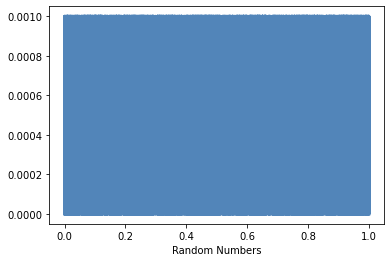

<Figure size 576x432 with 0 Axes>

In [38]:
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf])
thinkplot.Show(xlabel='Random Numbers')

The plot appears as one solid block, perhaps because as the excersise states: 
"The numbers generated by numpy.random.random are supposed to be uniform between 0 and 1; 
that is, every value in the range should have the same probability."

In [51]:
cdf = thinkstats2.Cdf(pmf)

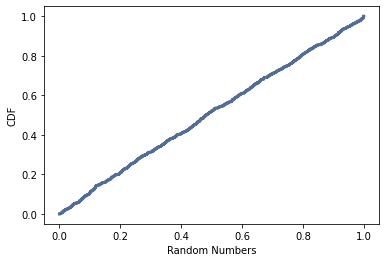

<Figure size 576x432 with 0 Axes>

In [40]:
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='Random Numbers', ylabel='CDF')

The distribution of the CDF for random numbers is uniform based on the plot above. 